In [290]:
import os
import surprise
from surprise import Reader, Dataset

file_path = os.path.expanduser('/Users/drakaris/Desktop/personalisation projects/personalization-theory-master/sampled_data.csv')
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_file(file_path, reader=reader)
data.split(n_folds=5) # data can now be used normally

In [291]:
from surprise import SVD, evaluate, GridSearch
from surprise import accuracy
algo=SVD(lr_all=0.01, reg_all=0.04, n_factors=100, n_epochs=100)
trainset = data.build_full_trainset()
algo.train(trainset)
# testset = trainset.build_testset()
testset = trainset.build_anti_testset()
predictions = algo.test(testset)
SVDbestRMSE=accuracy.rmse(predictions, verbose=True)


RMSE: 0.4827


In [292]:
from surprise import SVDpp, evaluate, GridSearch
algo=SVDpp(lr_all=0.01, reg_all=0.06, n_factors=100,n_epochs=20)
algo.train(trainset)
predictions = algo.test(testset)
SVDppbestRMSE=accuracy.rmse(predictions, verbose=True)

RMSE: 0.3064


In [296]:
from surprise import NMF, evaluate
algo=NMF(n_factors=20, reg_qi=0.06, n_epochs=20)
algo.train(trainset)
predictions = algo.test(testset)
NMFbestRMSE=accuracy.rmse(predictions, verbose=True)

RMSE: 1.2112


In [294]:
from surprise import BaselineOnly
algo=BaselineOnly()

algo.train(trainset)

predictions = algo.test(testset)
BaselinebestRMSE=accuracy.rmse(predictions, verbose=True)

Estimating biases using als...
RMSE: 0.3075


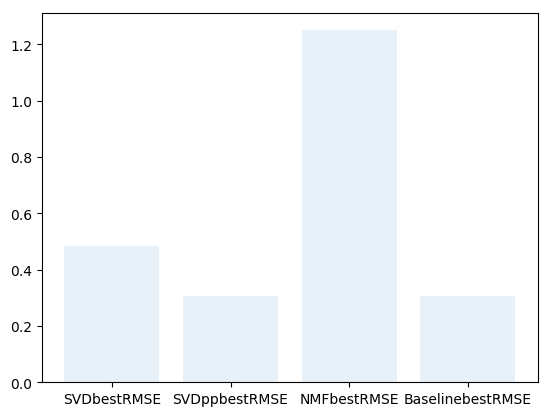

In [295]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = ("SVDbestRMSE","SVDppbestRMSE","NMFbestRMSE","BaselinebestRMSE")
y_pos = np.arange(len(objects))
performance = [SVDbestRMSE, SVDppbestRMSE,NMFbestRMSE,BaselinebestRMSE]
plt.bar(y_pos, performance, align='center', alpha=0.1)
plt.xticks(y_pos, objects)
plt.show()
